# Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download a few [MTA turnstile data files](http://web.mta.info/developers/turnstile.html)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }


In [468]:
import csv

lines = list(csv.reader(open("turnstile_161210.txt")))
lines2 = list(csv.reader(open("turnstile_161217.txt")))
lines3 = list(csv.reader(open("turnstile_161224.txt")))
lines4 = list(csv.reader(open("turnstile_161231.txt")))

lines = lines[1:]
lines2 = lines2[1:]
lines3 = lines3[1:]
lines4 = lines4[1:]
lines = lines+lines2+lines3+lines4
header  = lines[0]


In [804]:
lines4[:2]

[['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/24/2016',
  '03:00:00',
  'REGULAR',
  '0005980509',
  '0002025806                                            '],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/24/2016',
  '07:00:00',
  'REGULAR',
  '0005980531',
  '0002025818                                            ']]

In [469]:
print (header)
print (lines[:5])

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS                                                               ']
[['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/03/2016', '03:00:00', 'REGULAR', '0005944237', '0002014310                                            '], ['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/03/2016', '07:00:00', 'REGULAR', '0005944254', '0002014328                                            '], ['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/03/2016', '11:00:00', 'REGULAR', '0005944344', '0002014431                                            '], ['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/03/2016', '15:00:00', 'REGULAR', '0005944588', '0002014508                                            '], ['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/03/2016', '19:00:00', 'REGULAR', '0005945084', '0002014599                                            ']]


## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [471]:
station_dict= {}
i =0
for line in lines[:]:
    i+=1
    temp_key = tuple(line[0:4])
    temp_value = [line[4:]]
    if temp_key in station_dict.keys():
        station_dict[temp_key] = station_dict[temp_key] + temp_value
    else:
        station_dict[temp_key] = temp_value        


In [586]:
station_dict[('N126', 'R441', '00-00-01', 'VAN SICLEN AVE')]

[['C',
  'IND',
  '12/03/2016',
  '00:00:00',
  'REGULAR',
  '0000033804',
  '0000035506                                         '],
 ['C',
  'IND',
  '12/03/2016',
  '04:00:00',
  'REGULAR',
  '0000033823',
  '0000035552                                         '],
 ['C',
  'IND',
  '12/03/2016',
  '08:00:00',
  'REGULAR',
  '0000033893',
  '0000035577                                         '],
 ['C',
  'IND',
  '12/03/2016',
  '12:00:00',
  'REGULAR',
  '0000034042',
  '0000035618                                         '],
 ['C',
  'IND',
  '12/03/2016',
  '16:00:00',
  'REGULAR',
  '0000034172',
  '0000035744                                         '],
 ['C',
  'IND',
  '12/03/2016',
  '20:00:00',
  'REGULAR',
  '0000034278',
  '0000035916                                         '],
 ['C',
  'IND',
  '12/04/2016',
  '00:00:00',
  'REGULAR',
  '0000034327',
  '0000036015                                         '],
 ['C',
  'IND',
  '12/04/2016',
  '04:00:00',
  'REGULAR',
  '0000034

In [651]:
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *

new_dict ={}
temp_list = []
for k in station_dict.keys(): 
    temp_list = []    
    for v in station_dict[k]:
        entries = v[5]
        date = v[2]         
        time = v[3]
        date_time = date + " " + time 
        date_time = str(date_time) # date_time = '{} {}'.format(date, time)
        parse_dt = parse(date_time)
        temp_list.append([parse_dt, entries])
    # 
    new_dict[k] = temp_list        
new_dict[k]            

[[datetime.datetime(2016, 12, 3, 0, 0), '0000000835'],
 [datetime.datetime(2016, 12, 3, 4, 0), '0000000835'],
 [datetime.datetime(2016, 12, 3, 8, 0), '0000000835'],
 [datetime.datetime(2016, 12, 3, 12, 0), '0000000835'],
 [datetime.datetime(2016, 12, 3, 16, 0), '0000000835'],
 [datetime.datetime(2016, 12, 3, 20, 0), '0000000835'],
 [datetime.datetime(2016, 12, 4, 0, 0), '0000000835'],
 [datetime.datetime(2016, 12, 4, 4, 0), '0000000835'],
 [datetime.datetime(2016, 12, 4, 8, 0), '0000000836'],
 [datetime.datetime(2016, 12, 4, 12, 0), '0000000836'],
 [datetime.datetime(2016, 12, 4, 16, 0), '0000000836'],
 [datetime.datetime(2016, 12, 4, 20, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 0, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 4, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 8, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 12, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 16, 0), '0000000836'],
 [datetime.datetime(2016, 12, 5, 20, 0), '0000000836'],
 

## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [639]:
date_dict = {}
new_dict_sum_entries ={}
for k in station_dict.keys(): 
    temp_list_sum_entries = []    
    date= 0 #Dummy Variable
    for v in station_dict['N126', 'R441', '00-00-01', 'VAN SICLEN AVE']:        
        entries = v[5]
        check_date = v[2]                       
        if check_date != date and temp_list_sum_entries != []:
                max_entries = int(max(temp_list_sum_entries))
                min_entries = int(min(temp_list_sum_entries))
                daily_entries = max_entries- min_entries 
                if date != 0:
                    date_dict[date] = daily_entries
                    temp_list_sum_entries = []
        else:
                temp_list_sum_entries.append(entries)          
        date = check_date            
        if previous_date != 0 and daily_entries != 0:
            new_dict_sum_entries[k] = date_dict        

In [624]:
len(new_dict[k])
#len(date_dict.keys())

170

In [648]:
# Sample Entry
new_dict_sum_entries[('N126', 'R441', '00-00-01', 'VAN SICLEN AVE')]

{'12/03/2016': 474,
 '12/04/2016': 338,
 '12/05/2016': 753,
 '12/06/2016': 731,
 '12/07/2016': 727,
 '12/08/2016': 807,
 '12/09/2016': 757,
 '12/10/2016': 387,
 '12/11/2016': 281,
 '12/12/2016': 747,
 '12/13/2016': 734,
 '12/14/2016': 792,
 '12/15/2016': 723,
 '12/16/2016': 769,
 '12/17/2016': 380,
 '12/18/2016': 316,
 '12/19/2016': 731,
 '12/20/2016': 724,
 '12/21/2016': 725,
 '12/22/2016': 682,
 '12/23/2016': 712,
 '12/24/2016': 330,
 '12/25/2016': 272,
 '12/26/2016': 353,
 '12/27/2016': 521,
 '12/28/2016': 562,
 '12/29/2016': 514}

## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


In [536]:
%matplotlib inline
import matplotlib.pyplot as plt

dates = []
counts = []
for k in new_dict_sum_entries.keys():    
    dates = []
    counts = []
    i +=1
    for date in new_dict_sum_entries[k]:        
        dates.append(date)
        counts.append(new_dict_sum_entries[k][date])


In [537]:
len(dates)

27

([<matplotlib.axis.XTick at 0x10dd884e0>,
 <a list of 27 Text xticklabel objects>)

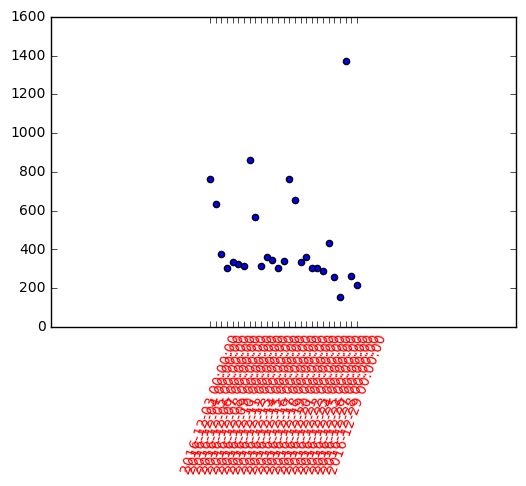

In [814]:
# WORKING WITH MENTOR ON X LABELS .... WIP
date_list= []
for date in dates:
    temp_date = datetime.strptime(date, '%m/%d/%Y')
    date_list.append(temp_date)
plt.scatter(date_list,counts)
plt.xticks(date_list, date_list,  color='red', rotation=70)

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [652]:
# THIS FEELS LIKE A HACK...BUT IT WORKS
import pandas as pd
import numpy as np
# FIRST SORTING AND THEN CONSOLIDATING STATIONS THAT SHARE THE SAME 'ControlArea/UNIT/STATION' COMBO
sorted_stations = sorted(new_dict_sum_entries.keys())
previous_station = 0 # DUMMY 
consolidated_entries = {}
tmp = []
tmp_series = pd.Series(index = list(range(27)))
sum_total = pd.Series(index = list(range(27)))
for i in range(len(sorted_stations)):
        for v in new_dict_sum_entries[sorted_stations[i]].values():
            tmp.append(v)  
        tmp_series = pd.Series([tmp], index = list(range(27)))
        tmp_series = pd.Series(tmp_series[1])
        tmp_series.fillna(0, inplace =True)
        tmp = []   
        if sorted_stations[i][0] != previous_station and i != 0:                   
            consolidated_entries[sorted_stations[i]] = sum_total        
            tmp_series = pd.Series(index = list(range(27)))
            sum_total = pd.Series(index = list(range(27)))
            sum_total.fillna(0, inplace =True)
        else:               
            sum_total = sum_total +tmp_series
        previous_station = sorted_stations[i][0]   

In [657]:
## CHECKING THAT A UNIQUE COMBO STATION HAS CONSOLIDATED ENTRIES
tmp = []
for t in consolidated_entries[sorted_stations[4073]]:
        tmp.append(t)
print(tmp)

[4689.0, 4626.0, 6921.0, 2844.0, 7263.0, 6138.0, 3420.0, 6723.0, 6579.0, 6777.0, 2529.0, 6408.0, 4266.0, 7128.0, 6579.0, 6543.0, 3177.0, 6525.0, 2448.0, 2970.0, 6606.0, 3042.0, 6507.0, 3483.0, 6516.0, 6813.0, 5058.0]


In [658]:
## VERIFYING DICTIONARY DATA STILL IN TACT
lst = []
for k,v in new_dict_sum_entries[sorted_stations[338]].items():
    lst.append((k,v))
lst.sort()
for key, val in lst:
    print(key, val)

12/03/2016 474
12/04/2016 338
12/05/2016 753
12/06/2016 731
12/07/2016 727
12/08/2016 807
12/09/2016 757
12/10/2016 387
12/11/2016 281
12/12/2016 747
12/13/2016 734
12/14/2016 792
12/15/2016 723
12/16/2016 769
12/17/2016 380
12/18/2016 316
12/19/2016 731
12/20/2016 724
12/21/2016 725
12/22/2016 682
12/23/2016 712
12/24/2016 330
12/25/2016 272
12/26/2016 353
12/27/2016 521
12/28/2016 562
12/29/2016 514


In [659]:
# CONSOLIDATION HAPPENED
print(len(new_dict_sum_entries.keys()))
len(consolidated_entries.keys())

4576


724

## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [660]:
# DROPPING INTO A PANDAS DF TO SORT BY STATION
import pandas as pd
sorted_stations_exclusive = pd.DataFrame(sorted_stations)
sorted_stations_exclusive.index = sorted_stations_exclusive.ix[:,3]
sorted_stations_exclusive= sorted_stations_exclusive.sort(axis =0)
sorted_stations_exclusive.to_csv("sorted_stations_exclusive.csv", index =False)

/Users/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [661]:
# BACK OUT AND INTO A LIST
keys_by_station = list(csv.reader(open("sorted_stations_exclusive.csv")))
keys_by_station= keys_by_station[1:] 
print(len(keys_by_station[1:]))
keys_by_station[:10]

4575


[['H008', 'R248', '01-00-00', '1 AV'],
 ['H007', 'R248', '00-03-00', '1 AV'],
 ['H008', 'R248', '01-00-01', '1 AV'],
 ['H008', 'R248', '01-00-02', '1 AV'],
 ['H008', 'R248', '01-00-03', '1 AV'],
 ['H008', 'R248', '01-00-04', '1 AV'],
 ['H007', 'R248', '00-00-01', '1 AV'],
 ['H007', 'R248', '00-03-02', '1 AV'],
 ['H007', 'R248', '00-03-01', '1 AV'],
 ['H007', 'R248', '00-00-00', '1 AV']]

In [662]:
a = tuple(keys_by_station[:][i])
new_dict_sum_entries[a]
#type(a)

{'12/03/2016': 474,
 '12/04/2016': 338,
 '12/05/2016': 753,
 '12/06/2016': 731,
 '12/07/2016': 727,
 '12/08/2016': 807,
 '12/09/2016': 757,
 '12/10/2016': 387,
 '12/11/2016': 281,
 '12/12/2016': 747,
 '12/13/2016': 734,
 '12/14/2016': 792,
 '12/15/2016': 723,
 '12/16/2016': 769,
 '12/17/2016': 380,
 '12/18/2016': 316,
 '12/19/2016': 731,
 '12/20/2016': 724,
 '12/21/2016': 725,
 '12/22/2016': 682,
 '12/23/2016': 712,
 '12/24/2016': 330,
 '12/25/2016': 272,
 '12/26/2016': 353,
 '12/27/2016': 521,
 '12/28/2016': 562,
 '12/29/2016': 514}

In [663]:
# SIMILIAR TO ABOVE... SORTING AND THEN CONSOLIDATING ENTRIES UNDER THE SAME STATION
                
previous_station = 0 # DUMMY 
consolidated_station_entries = {}
tmp = []
tmp_series = pd.Series(index = list(range(27)))
sum_total = pd.Series(index = list(range(27)))
for i in range(len(keys_by_station)):
        for v in new_dict_sum_entries[tuple(keys_by_station[i])].values():
            tmp.append(v)  
        tmp_series = pd.Series([tmp], index = list(range(27)))
        tmp_series = pd.Series(tmp_series[1])
        tmp_series.fillna(0, inplace =True)
        tmp = []   
        if keys_by_station[i][3] != previous_station and i != 0:                   
            consolidated_station_entries[tuple(keys_by_station[i])] = sum_total        
            tmp_series = pd.Series(index = list(range(27)))
            sum_total = pd.Series(index = list(range(27)))
            sum_total.fillna(0, inplace =True)
        else:               
            sum_total = sum_total +tmp_series
        previous_station = keys_by_station[i][3]  

In [710]:
# NUM OF UNIQUE STATIONS & EXAMPLE OF STATION
print(len(consolidated_station_entries))
#consolidated_station_entries.keys()

369


## Exercise 7
- Plot the time series for a station

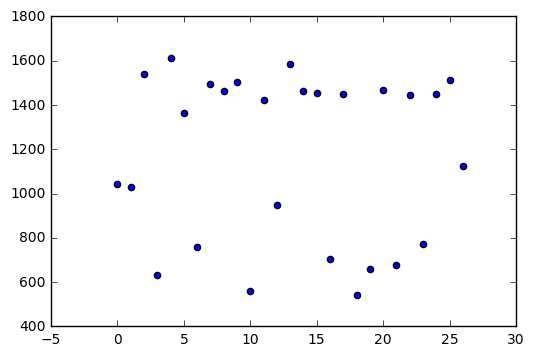

In [668]:
# AGAIN, WORKING ON SETTING THE X AXIS LABELS (INSTEAD OF THE NUMERICS)
sample_station = consolidated_station_entries[('N089', 'R139', '00-04-01', 'CANAL ST')]
#dates= (# '12/03/2016',
# '12/04/2016',
# '12/05/2016'
#'12/06/2016',
# '12/07/2016',
# '12/08/2016',
# '12/09/2016',
# '12/10/2016',
# '12/11/2016')
#'12/12/2016',
# '12/13/2016',
# '12/14/2016',
# '12/15/2016',
# '12/16/2016',
# '12/17/2016')
#'12/18/2016',
# '12/19/2016',
# '12/20/2016',
# '12/21/2016',
# '12/22/2016',
# '12/23/2016')
#'12/24/2016',
# '12/25/2016',
# '12/26/2016',
# '12/27/2016',
# '12/28/2016',
# '12/29/2016')
index = consolidated_station_entries[('N089', 'R139', '00-04-01', 'CANAL ST')].index
plt.scatter(index,sample_station)

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



In [701]:
entries_only_list = []
monthly_entries = []
for k,v in new_dict_sum_entries[('N126', 'R441', '00-00-01', 'VAN SICLEN AVE')].items():
    monthly_entries.append((k,v))
monthly_entries.sort()
for key, val in monthly_entries:
    entries_only_list.append(val)
        
week1= entries_only_list[0:7]
week2= entries_only_list[7:14]        
week3= entries_only_list[14:21]        
week4= entries_only_list[21:]        

# Sample Week
week1

[474, 338, 753, 731, 727, 807, 757]

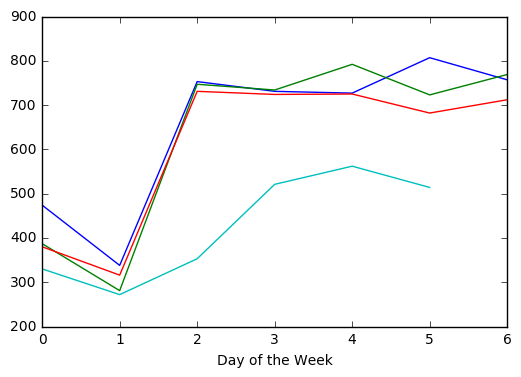

In [709]:
# I SEE THAT I NEED TO PICK UP THE LAST DAY OF THE MONTH (and again set x labesl to day of week)
plt.plot(range(len(week1)), week1)
plt.plot(range(len(week2)), week2)
plt.plot(range(len(week3)), week3)
plt.plot(range(len(week4)), week4)
plt.xlabel('Day of the Week')

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [724]:
sum_monthly_entries_dict = {}
monthly_entries_list = []

for k in consolidated_station_entries.keys():
    for key,val in consolidated_station_entries[k].items():
        monthly_entries_list.append((val))
    sum_monthly_entries= sum(monthly_entries_list)
    sum_monthly_entries_dict[k] = sum_monthly_entries    

In [731]:
station_entries = pd.Series(sum_monthly_entries_dict, index=sum_monthly_entries_dict.keys())
station_entries.head()

(N089, R139, 00-04-01, CANAL ST)              31684.0
(R509, R121, 00-00-05, QUEENSBORO PLZ)       728732.0
(H041, R152, 00-06-00, CANARSIE-ROCKAW)     1631726.0
(N010, R126, 00-00-00, 175 ST)             30685954.0
(K024, R403, 00-00-02, FOREST AVE)          1901040.0
dtype: float64

In [780]:
station_entries_df = pd.DataFrame(station_entries, columns = ["Sum Entries"])

In [789]:
#station_entries_df =station_entries_df.dropna()
## ARGUMENT 'ASCENDING' NOT WORKING FOR SOME REASON (same with .sort) SO ....
station_entries_df = station_entries_df.sort_index(axis= 1, ascending=False)
station_entries_df.head()

,Sum Entries
"(N089, R139, 00-04-01, CANAL ST)",31684.0
"(N183, R415, 00-00-01, BROAD CHANNEL)",237630.0
"(C010, R231, 00-00-02, UNION ST)",364366.0
"(R509, R121, 00-00-05, QUEENSBORO PLZ)",728732.0
"(H041, R152, 00-06-00, CANARSIE-ROCKAW)",1631726.0


In [791]:
# ... FLIPPED IT UPSIDE DOWN
total_ridership_values = station_entries_df.ix[::-1]
total_ridership_values.head()

,Sum Entries
"(N416, R286, 01-06-01, MYRTLE-WILLOUGH)",54258850.0
"(R510, R090, 00-00-02, 39 AV)",54211324.0
"(N186, R418, 00-00-00, BEACH 105 ST)",53973694.0
"(N110, R283, 00-03-00, LAFAYETTE AV)",53942010.0
"(PTH12, R542, 00-04-03, TWENTY THIRD ST)",53609328.0


## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

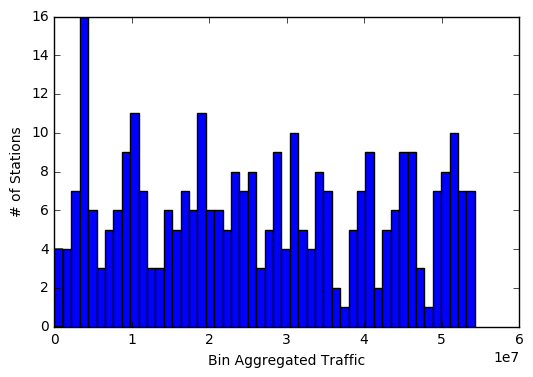

In [803]:
## AGGREGATED TRAFFIC HISTOGRAM
#indices = range(len(total_ridership_values))
#plt.bar(indices, total_ridership_values["Sum Entries"])
plt.hist(total_ridership_values["Sum Entries"], bins = 50)
plt.xlabel('Bin Aggregated Traffic')
plt.ylabel('# of Stations')                